<div class="alert alert-block alert-success">
    <b><center>LOGISTIC CLASSFICATION</center></b>
    <b><center>Tensorflow 2를 이용한 코드 예제</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses

In [3]:
np.set_printoptions(linewidth=200, precision=2)
sns.set_style("whitegrid")
tf.__version__

'2.0.0'

# Prepare Data

>* Sepal Length : 꽃받침의 길이 정보.
>* Sepal Width : 꽃받침의 너비 정보.
>* Petal Length : 꽃잎의 길이 정보.
>* Petal Width : 꽃잎의 너비 정보.
>* Species : 꽃의 종류 정보 (setosa / versicolor / virginica 의 3종류로 구분).

In [4]:
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
iris = iris[iris.species.isin(["setosa", "versicolor"])]

In [7]:
iris.replace({ "species": {"setosa": 0, "versicolor": 1} }, inplace=True)
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [9]:
data = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
label = iris[["species"]].values

# Analysis Datas

In [10]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,100.0,5.471,0.641698,4.3,5.0,5.40,5.900,7.0
sepal_width,100.0,3.099,0.478739,2.0,2.8,3.05,3.400,4.4
petal_length,100.0,2.861,1.449549,1.0,1.5,2.45,4.325,5.1
petal_width,100.0,0.786,0.565153,0.1,0.2,0.80,1.300,1.8
species,100.0,0.500,0.502519,0.0,0.0,0.50,1.000,1.0


## Generate Model

In [11]:
model = models.Sequential([
    layers.Input([4]),
    layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


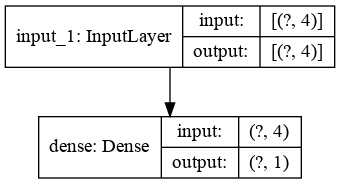

In [12]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [13]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(3e-2)
)

## Training

In [14]:
history = model.fit(
    data, label, epochs=200
)

Train on 100 samples
Epoch 1/200
100/100 [==============================] - 0s 4ms/sample - loss: 0.9019
Epoch 2/200
100/100 [==============================] - 0s 73us/sample - loss: 0.5457
Epoch 3/200
100/100 [==============================] - 0s 67us/sample - loss: 0.4799
Epoch 4/200
100/100 [==============================] - 0s 69us/sample - loss: 0.4413
Epoch 5/200
100/100 [==============================] - 0s 67us/sample - loss: 0.4232
Epoch 6/200
100/100 [==============================] - 0s 64us/sample - loss: 0.3913
Epoch 7/200
100/100 [==============================] - 0s 63us/sample - loss: 0.3713
Epoch 8/200
100/100 [==============================] - 0s 64us/sample - loss: 0.3495
Epoch 9/200
100/100 [==============================] - 0s 68us/sample - loss: 0.3314
Epoch 10/200
100/100 [==============================] - 0s 68us/sample - loss: 0.3189
Epoch 11/200
100/100 [==============================] - 0s 66us/sample - loss: 0.3026
Epoch 12/200
100/100 [=====================

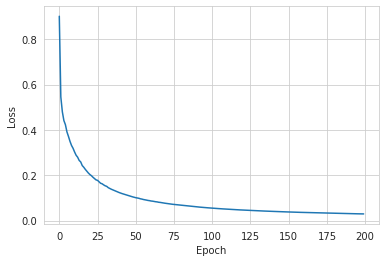

In [15]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.show()

## Predict

In [21]:
errors = []
for itemData, itemLabel in zip(data, label):
    predicted = model.predict([itemData.tolist()])
    species = np.asscalar(itemLabel)
    speciesPred = np.asscalar(predicted)
    errors.append(0 if abs(speciesPred - species) > 5 else 1)

In [22]:
np.sum(errors) / data.shape[0]

1.0

In [23]:
errors

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]